# Analyze Patterns

The `arcgis.geoanalytics.analyze_patterns` submodule contains functions that help you identify, quantify, and visualize spatial patterns in your data.

## Table of Contents
* [Calculate Density](#Calculate-Density)
* [Create Space Time Cube](#Create-Space-Time-Cube)
* [Find Hot Spots](Find-Hot-Spots)
* [Find Point Clusters](#Find-Point-Clusters)
* [Forest](Forest)
* [GLR](GLR)
* [GWR](GWR)

This toolset uses distributed processing to complete analytics on your GeoAnalytics Server.

<table>
  <tr>
    <th><center>Tool</center></th>
    <th><center>Description</center></th>    
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-calculate-density.htm"><p align="left">calculat_density</p></a></td>
      <td><p align="left">Calculates a magnitude-per-unit area from point features that fall within a neighborhood around each cell.</p></td>
  </tr>
  <tr>
      <td><a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/create-space-time-cube.htm"><p align="left">create_space_time_cube</p></a></td>
      <td><p aligh="left">Summarizes a set of points into a netCDF data structure by aggregating them into space-time bins. Within each bin, the points are counted, and specified attributes are aggregated. For all bin locations, the trend for counts and summary field values are evaluated.</p></td>
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-find-hot-spots.htm"><p align="left">find_hot_spots</p></a></td>
      <td><p align="left">Given a set of features, identifies statistically significant hot spots and cold spots using the Getis-Ord Gi* statistic.</p></td>
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-forest-based-classification-and-regression.htm"><p align="left">forest</p></a></td>
      <td><p align="left">Creates models and generates predictions using an adaptation of Leo Breiman's random forest algorithm, which is a supervised machine learning method. Predictions can be performed for both categorical variables (classification) and continuous variables (regression). Explanatory variables can take the form of fields in the attribute table of the training features. In addition to validation of model performance based on the training data, predictions can be made to features.</p></td>
  </tr>
  <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-generalized-linear-regression.htm"><p align="left">glr</p></a></td>
      <td><p align="left">Performs generalized linear regression (GLR) to generate predictions or to model a dependent variable in terms of its relationship to a set of explanatory variables. This tool can be used to fit continuous (OLS), binary (logistic), and count (Poisson) models.</p></td>
  </tr>   
   <tr>
      <td><a href="https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-geographically-weighted-regression.htm"><p align="left">gwr</p></a></td>
      <td><p align="left">Performs Geographically Weighted Regression (GWR), which is a local form of linear regression that is used to model spatially varying relationships.</p></td>
  </tr> 

<b>Necessary imports</b>

In [1]:
# connect to Enterprise GIS
from arcgis.gis import GIS
import arcgis.geoanalytics

portal_gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

Adding a big data file share to the Geoanalytics server adds a corresponding big data file share item on the portal. We can search for these types of items using the `item_type` parameter.

<b>Get the data</b>

In [2]:
search_result1 = portal_gis.content.get('449e9eae6ea34fb5a3bab07463366d0a')
search_result1

<Item title:"calgary_no_southland_solar" type:Feature Layer Collection owner:arcgis_python>

In [3]:
data_layer = search_result1.layers[0]

In [4]:
search_result2 = portal_gis.content.search("bigDataFileShares_ServiceCallsOrleans", 
                                          item_type = "big data file share", 
                                          max_items=40)
search_result2

[<Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:portaladmin>]

In [5]:
data_item = search_result2[0]
data_item

<Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:portaladmin>

Querying the `layers` property of the [item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item) returns a featureLayer representing the data.

In [6]:
#displays layers in the item
data_item.layers

[<Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_ServiceCallsOrleans/BigDataCatalogServer/yearly_calls">]

In [7]:
calls = data_item.layers[0] #select first layer 
calls

<Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_ServiceCallsOrleans/BigDataCatalogServer/yearly_calls">

In [8]:
calls.properties

{
  "dataStoreID": "cff51a1a-4f27-4955-a3ef-5fa23240ccf9",
  "fields": [
    {
      "name": "NOPD_Item",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Type_",
      "type": "esriFieldTypeString"
    },
    {
      "name": "TypeText",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Priority",
      "type": "esriFieldTypeString"
    },
    {
      "name": "MapX",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "MapY",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "TimeCreate",
      "type": "esriFieldTypeString"
    },
    {
      "name": "TimeDispatch",
      "type": "esriFieldTypeString"
    },
    {
      "name": "TimeArrive",
      "type": "esriFieldTypeString"
    },
    {
      "name": "TimeClosed",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Disposition",
      "type": "esriFieldTypeString"
    },
    {
      "name": "DispositionText",
      "type": "esriFieldTypeString"
    },
    {
      "name

## Calculate Density

[`calculate_density`](https://developers.arcgis.com/rest/services-reference/enterprise/calculate-density-geoanalytics.htm) tool uses input point features to calculate a density map within an area of interest.



<center><img src="../../static/img/guide_img/ga/calculate_density.png" height="300" width="300"></center>

The `calculate_density` tool creates a density map from point features by spreading known quantities of some phenomenon (represented as attributes of the points) across the map. The result is a layer of areas classified from least dense to most dense.

For point input, each point should represent the location of some event or incident, and the result layer represents a count of the incident per unit area. A higher density value in a new location means that there are more points near that location. In many cases, the result layer can be interpreted as a risk surface for future events. For example, if the input points represent locations of lightning strikes, the result layer can be interpreted as a risk surface for future lightning strikes.

In [9]:
from arcgis.geoanalytics.analyze_patterns import calculate_density
from datetime import datetime as dt

This example calculates the density of calls using 1-Meters bin and a 100-Meters neighborhood. The result layer will show areas with high and low calls count, and this information can be used by help police departments to allocate resources to high crime areas.

In [11]:
##usage example
density = calculate_density(calls, 
                            bin_size=1,
                            bin_size_unit='Meters',
                            radius=100,
                            radius_unit='Meters',
                            output_name='calculate density' + str(dt.now().microsecond))
density

Attaching log redirect
Log level set to DEBUG
{"messageCode":"BD_101042","message":"Unable to access file share.  Please verify that your ArcGIS Server user account has access to the file share."}
Detaching log redirect
Failed to execute (CalculateDensity).
Failed.


Exception: Unable to delete item.
Unable to delete item: https://pythonapi.playground.esri.com/server/rest/services/Hosted/calculate_density356649/FeatureServer
(Error Code: 500)

#### Create Space Time Cube

Summarizes a set of points into a netCDF data structure by aggregating them into space-time bins. Within each bin, the points are counted, and specified attributes are aggregated. For all bin locations, the trend for counts and summary field values are evaluated.

<center><img src="../../static/img/guide_img/ga/create_space_time_cube.png" height="300" width="300"></center>

[`create_space_time_cube`](https://developers.arcgis.com/rest/services-reference/enterprise/create-space-time-cube.htm) works with a layer of point features that are time enabled. It aggregates the data into a three-dimensional cube of space-time bins. When determining the point in a space-time bin relationship, statistics about all points in the space-time bins are calculated and assigned to the bins. The most basic statistic is the number of points within the bins, but you can calculate other statistics as well. For example, suppose you have point features of crimes in a city, and you want to summarize the number of crimes in both space and time. You can calculate the space-time cube for the dataset, and use the cube to further analyze trends such as emerging hot and cold spots.

In [8]:
from arcgis.geoanalytics.analyze_patterns import create_space_time_cube

This example creates space time cube of calls using 5-Miles bins and a 1-day time step.

In [11]:
##usage example
create_space_time_cube(point_layer=calls,
                       bin_size=5,
                       bin_size_unit="Miles",
                       time_step_interval=1,
                       time_step_interval_unit="Days",
                       time_step_alignment='StartTime',
                       output_name="space_time_cube")

Attaching log redirect
Log level set to DEBUG
Detaching log redirect


{"url": "https://pythonapi.playground.esri.com/ga/rest/directories/arcgisjobs/system/geoanalyticstools_gpserver/j2c39be7b2a8a490b95df1383cdc355e6/scratch/space_time_cube.nc"}

As you open the link in browser, you will notice a .nc file starts to download. You could now visualize it in ArcGIS Pro.

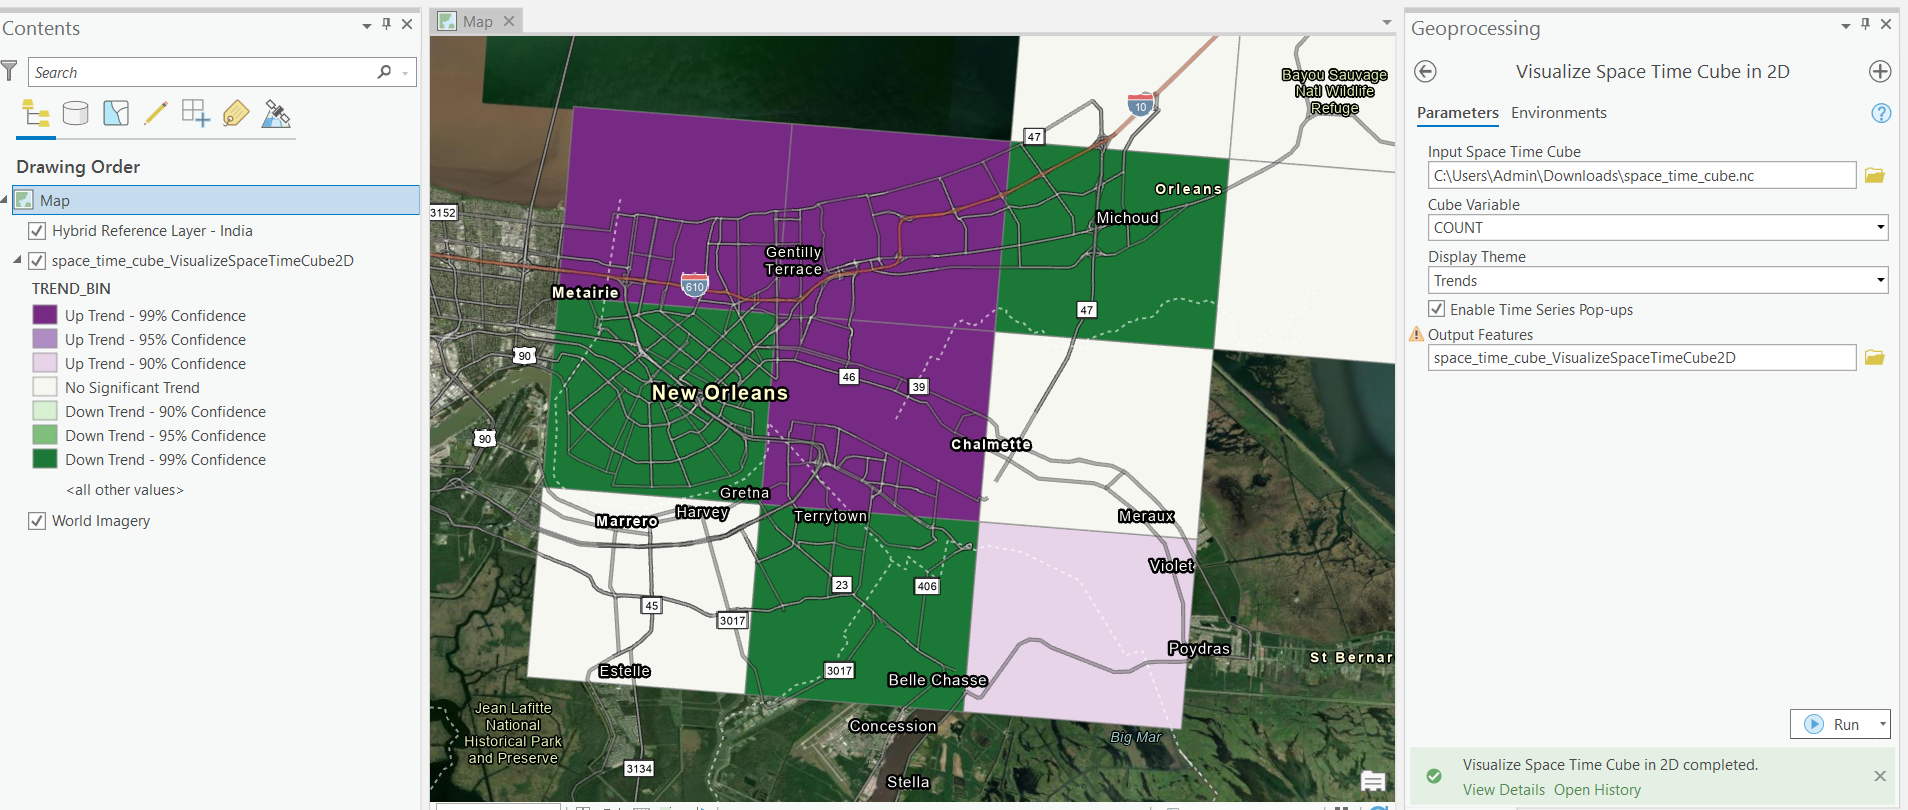

#### Find Hot Spots

The [`find_hot_spots`](https://developers.arcgis.com/rest/services-reference/enterprise/find-hot-spots.htm) tool determines if there is any statistically significant clustering in the spatial pattern of your data.

<center><img src="../../static/img/guide_img/ga/find_hot_spots.png" height="300" width="300"></center>

The `find_hot_spots` tool analyzes point data (such as crime incidents, traffic accidents, trees, and so on) or field values associated with points. It finds statistically significant spatial clusters of high incidents (hot spots) and low incidents (cold spots). Hot spots are locations with lots of points and cold spots are locations with very few points.

The result map layer shows hot spots in red and cold spots in blue. The darkest red features indicate the strongest clustering of point densities; you can be 99 percent confident that the clustering associated with these features could not be the result of random chance. Similarly, the darkest blue features are associated with the strongest spatial clustering of the lowest point densities. Features that are beige are not part of a statistically significant cluster; the spatial pattern associated with these features could very likely be the result of random processes and random chance.

In [11]:
from arcgis.geoanalytics.analyze_patterns import find_hot_spots
from datetime import datetime as dt

This example finds hot spots of calls with hot spot cell size of 100 Meters.

In [13]:
##usage example
hot_spots = find_hot_spots(calls, 
                           bin_size=100,
                           bin_size_unit='Meters',
                           neighborhood_distance=250,
                           neighborhood_distance_unit='Meters',
                           output_name="get hot spot areas" + str(dt.now().microsecond))
hot_spots

<Item title:"get_hot_spot_areas52076" type:Feature Layer Collection owner:arcgis_python>

#### Find Point Clusters

The [`find_point_clusters`](https://developers.arcgis.com/rest/services-reference/enterprise/find-point-clusters.htm) tool finds clusters of point features in surrounding noise based on their spatial or spatiotemporal distribution.

<center><img src="../../static/img/guide_img/ga/find_point_clusters.png" height="300" width="300"></center>

This tool extracts clusters from your input point features and identifies any surrounding noise.

For example, a nongovernmental organization is studying a particular pest-borne disease. It has a point dataset representing households in a study area, some of which are infested, and some of which are not. By using the Find Point Clusters tool, an analyst can determine clusters of infested households to help pinpoint an area to begin treatment and extermination of pests.

In [14]:
from arcgis.geoanalytics.analyze_patterns import find_point_clusters

This example finds clusters of calls withing 1 Mile search distance forming clusters specified by min_feature_clusters parameter. min_feature_clusters is the number of features that must be found within a search range of a point for that point to start forming a cluster. 

In [18]:
##usage example
point_clusters = find_point_clusters(calls, 
                                     method='DBSCAN', 
                                     min_feature_clusters=5,
                                     search_distance=1, 
                                     distance_unit='Miles',
                                     output_name='point clusters' + str(dt.now().microsecond))

AttributeError: 'FeatureLayer' object has no attribute 'result'

In [16]:
point_clusters = find_point_clusters(calls, 
                                     method='HDBSCAN', 
                                     min_feature_clusters=5, 
                                     output_name='point clusters' + str(dt.now().microsecond))

AttributeError: 'FeatureLayer' object has no attribute 'result'

#### Forest

The [`forest`](https://developers.arcgis.com/rest/services-reference/enterprise/forest-based-classification-and-regression.htm) method creates models and generates predictions using an adaptation of Leo Breiman's random forest algorithm, which is a supervised machine learning method. Predictions can be performed for both categorical variables (classification) and continuous variables (regression). Explanatory variables can take the form of fields in the attribute table of the training features. In addition to validation of model performance based on the training data, predictions can be made to features.

<center><img src="../../static/img/guide_img/ga/forest.png" height="300" width="300"></center>

In [8]:
from arcgis.geoanalytics.analyze_patterns import forest

This example predicts total solar energy produced using variables such as 
- wind_speed : wind speed(m/sec)
- dayl__s_ : Day length (sec/day)
- prcp__mm_d : Precipitation (mm/day)
- srad__W_m_ : Shortwave radiation (W/m^2)
- swe__kg_m_ : Snow water equivalent (kg/m^2)
- tmax__deg : Maximum air temperature (degrees C)
- tmin__deg : Minimum air temperature (degrees C)
- vp__Pa_ : Water vapor pressure (Pa)

For more details, refer [here](https://developers.arcgis.com/python/sample-notebooks/solar-energy-prediction-using-weather-variables/)

In [5]:
##usage example
forest(input_layer=data_layer,
       var_prediction={"fieldName":"capacity_f", "categorical":False},
       var_explanatory=[{"fieldName":"altitude_m", "categorical":False},
                        {"fieldName":"wind_speed", "categorical":False},
                        {"fieldName":"dayl__s_", "categorical":False},
                        {"fieldName":"prcp__mm_d", "categorical":False},
                        {"fieldName":"srad__W_m_", "categorical":False},
                        {"fieldName":"swe__kg_m_", "categorical":False},
                        {"fieldName":"tmax__deg", "categorical":False},
                        {"fieldName":"tmin__deg", "categorical":False},
                        {"fieldName":"vp__Pa_", "categorical":False}
                       ],
       prediction_type="TrainAndPredict",
       trees=200,
       importance_tbl=True)

AttributeError: 'ToolOutput' object has no attribute 'result'

In [57]:
forest(input_layer=data_layer,
       var_prediction={"fieldName":"capacity_f", "categorical":False},
       var_explanatory=[{"fieldName":"altitude_m", "categorical":False},
                        {"fieldName":"wind_speed", "categorical":False},
                        {"fieldName":"dayl__s_", "categorical":False},
                        {"fieldName":"prcp__mm_d", "categorical":False},
                        {"fieldName":"srad__W_m_", "categorical":False},
                        {"fieldName":"swe__kg_m_", "categorical":False},
                        {"fieldName":"tmax__deg", "categorical":False},
                        {"fieldName":"tmin__deg", "categorical":False},
                        {"fieldName":"vp__Pa_", "categorical":False}
                       ],
       trees=200,
       output_name='test')

AttributeError: 'ToolOutput' object has no attribute 'result'

#### GLR

Performs Generalized Linear Regression ([GLR](https://developers.arcgis.com/rest/services-reference/enterprise/generalized-linear-regression.htm)) to generate predictions or to model a dependent variable in terms of its relationship to a set of explanatory variables. This tool can be used to fit continuous (Gaussian), binary (logistic), and count (Poisson) models.

<center><img src="../../static/img/guide_img/ga/glr.png" height="300" width="300"></center>

In [6]:
from arcgis.geoanalytics.analyze_patterns import glr

In [9]:
glr_output = glr(data_layer, 
                 var_dependent='capacity_f',
                 var_explanatory=['altitude_m', 'wind_speed', 'dayl__s_', 'prcp__mm_d',
                                  'srad__W_m_','swe__kg_m_','tmax__deg','tmin__deg','vp__Pa_'],
                 output_name='glr' + str(dt.now().microsecond))
glr_output

<Item title:"glr764996" type:Feature Layer Collection owner:arcgis_python>

#### GWR

This tool performs GeographicallyWeightedRegression ([GWR](https://enterprise.arcgis.com/en/portal/latest/use/geoanalytics-geographically-weighted-regression.htm)), which is a local form of linear regression used to model spatially varying relationships.

The following are examples of the types of questions you can answer using this tool:

Is the relationship between educational attainment and income consistent across the study area?

What are the key variables that explain high forest fire frequency?

Where are the districts in which children are achieving high test scores? What characteristics seem to be associated? Where is each characteristic most important?

<center><img src="../../static/img/guide_img/ga/gwr.png" height="300" width="300"></center>

In [10]:
from arcgis.geoanalytics.analyze_patterns import gwr

In [37]:
gwr_output = gwr(data_layer, 
                 dependent_variable=['size'], 
                 explanatory_variables=['Wind'],
                 neighborhood_selection_method='UserDefined',
                 distance_band=1,
                 distance_band_unit='Meters',
                 output_name='gwr' + str(dt.now().microsecond))
gwr_output

2021-06-20 19:50:00,715 arcgis.geoprocessing._support ERROR {"messageCode":"BD_101165","message":"The dependent variable size does not exist or is invalid. Dependent variables must be numeric.","params":{"dependentVariable":"size"}}
2021-06-20 19:50:00,719 arcgis.geoprocessing._support ERROR Failed to execute (GeographicallyWeightedRegression).
2021-06-20 19:50:00,720 arcgis.geoprocessing._support ERROR Failed.


Exception: Item does not exist or is inaccessible.
(Error Code: 400)